In [116]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import matplotlib
matplotlib.rcParams["figure.figsize"] = [5,5]
from sklearn.linear_model import LogisticRegression
from math import sqrt

In [39]:
# generate linearly separable data

def generate_linear_data(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    df = pd.DataFrame({"x":x, "y":y})
    
    def check_side(x):
        if(x["x"] + np.random.rand()*.1 > x["y"] - np.random.rand()*.1):
            return 1
        else:
            return 0
        
    target = df.apply(check_side,axis=1)
    
    return  df , target

In [40]:
X,target = generate_linear_data(1000)

In [41]:
X.head(2)

,x,y
0,0.647076,0.684616
1,0.088253,0.832886


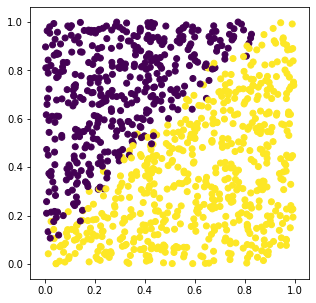

In [42]:
plt.scatter(X.x, X.y, c=target)
plt.show()

In [43]:
# Train an svm

clf = SVC(kernel="linear")

In [44]:
clf.fit(X, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [45]:
pred = clf.predict(X)

In [46]:
# confusion matrix
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(target, pred)

array([[396,  18],
       [ 14, 572]])

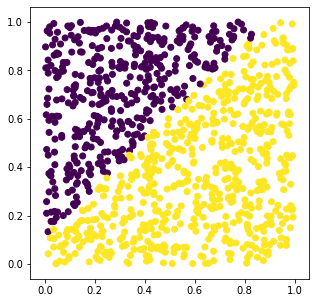

In [48]:
plt.scatter(X.x, X.y, c=pred)
plt.show()

In [52]:
# Fit logistic model
clf2=LogisticRegression()
clf2.fit(X, target)
pred2=clf2.predict(X)

In [53]:
confusion_matrix(target,pred2)

array([[394,  20],
       [ 12, 574]])

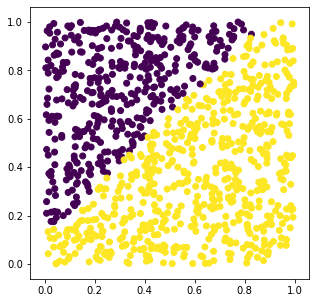

In [54]:
plt.scatter(X.x, X.y, c=pred2)
plt.show()

In [69]:
# generate non - linear data - sin function

def generate_sin_data(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    df = pd.DataFrame({"x":x, "y":y})
    
    def check_side(x):
        if(np.sin(x["x"]*10)/5 + 0.5 > x["y"]):
            return 1
        else:
            return 0
        
    target = df.apply(check_side,axis=1)
    
    return  df , target

In [70]:
X, target = generate_sin_data(1000)

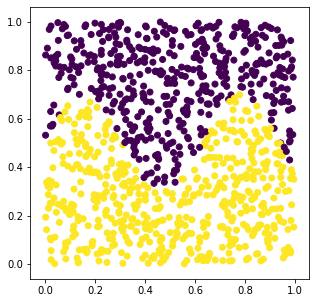

In [71]:
plt.scatter(X.x, X.y, c=target)
plt.show()

In [74]:
clf.fit(X, target)
pred = clf.predict(X)

clf2.fit(X, target)
pred2 = clf2.predict(X)


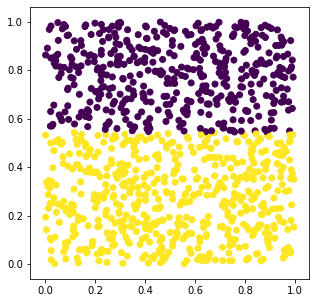

In [75]:
plt.scatter(X.x, X.y, c=pred)
plt.show()

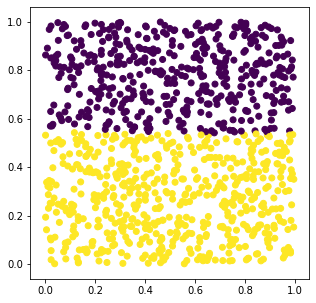

In [76]:
plt.scatter(X.x, X.y, c=pred2)
plt.show()

In [77]:
print(confusion_matrix(target,pred))
print(confusion_matrix(target,pred2))

[[399  58]
 [ 46 497]]
[[399  58]
 [ 47 496]]


In [139]:
# polynomial kernel

clf3 = SVC(kernel="poly", degree=6, coef0=1)
clf4 = SVC(kernel="rbf", gamma=10)

In [111]:
clf3.fit(X, target)
pred3 = clf3.predict(X)

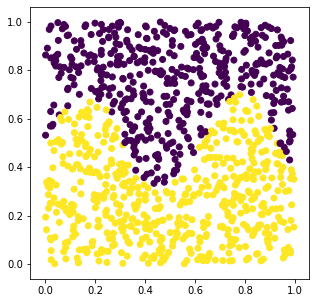

In [112]:
plt.scatter(X.x, X.y, c=pred3)
plt.show()

In [113]:
print(confusion_matrix(target,pred))
print(confusion_matrix(target,pred2))
print(confusion_matrix(target,pred3))


[[399  58]
 [ 44 499]]
[[399  58]
 [ 47 496]]
[[452   5]
 [  3 540]]


In [120]:
# generate circular multiclass data

def generate_circular_data(N):
    x = np.random.rand(N)
    y = np.random.rand(N)
    df = pd.DataFrame({"x":x, "y":y})
    center1 = (.3 , .7)
    center2 = (.7 , .3)
    radius = 0.2
    
    def check_side(x):
        if( sqrt((x["x"]-center1[0])*(x["x"]-center1[0]) + (x["y"]-center1[1])*(x["y"]-center1[1])) < radius ):
            return 2
        if( sqrt((x["x"]-center2[0])*(x["x"]-center2[0]) + (x["y"]-center2[1])*(x["y"]-center2[1])) < radius ):
            return 1
        else:
            return 0
        
    target = df.apply(check_side,axis=1)
    
    return  df , target

In [121]:
X, target = generate_circular_data(1000)

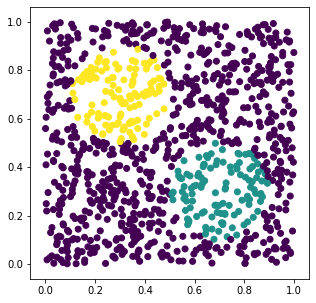

In [122]:
plt.scatter(X.x, X.y, c=target)
plt.show()

In [140]:
clf3.fit(X,target)
clf4.fit(X,target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [141]:
pred3=clf3.predict(X)
pred4=clf4.predict(X)


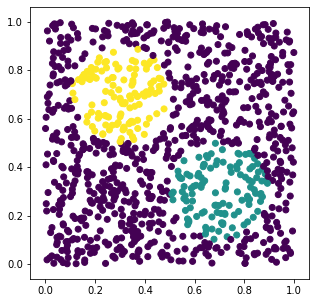

In [142]:
plt.scatter(X.x, X.y, c=pred3)
plt.show()

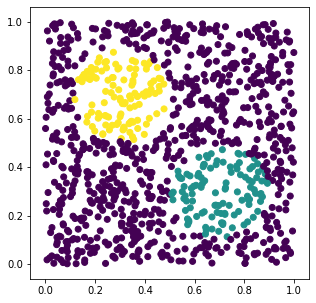

In [143]:
plt.scatter(X.x, X.y, c=pred4)
plt.show()

[[762   0   0]
 [  0 118   0]
 [  1   0 119]]
[[762   0   0]
 [  6 112   0]
 [  6   0 114]]


In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [147]:
clf5 = DecisionTreeClassifier()
clf6 = RandomForestClassifier(n_estimators=100)

In [148]:
clf5.fit(X,target)
clf6.fit(X,target)

pred5=clf5.predict(X)
pred6=clf6.predict(X)

In [149]:
print(confusion_matrix(target,pred3))
print(confusion_matrix(target,pred4))
print(confusion_matrix(target,pred6))
print(confusion_matrix(target,pred5))


[[762   0   0]
 [  0 118   0]
 [  1   0 119]]
[[762   0   0]
 [  6 112   0]
 [  6   0 114]]
[[762   0   0]
 [  0 118   0]
 [  0   0 120]]
[[762   0   0]
 [  0 118   0]
 [  0   0 120]]


In [ ]:
# Florence dataset -> 
# train  and test
# svm with kernel and hyperparameters
# decision, randomforest
# knearest nearest neigh